# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

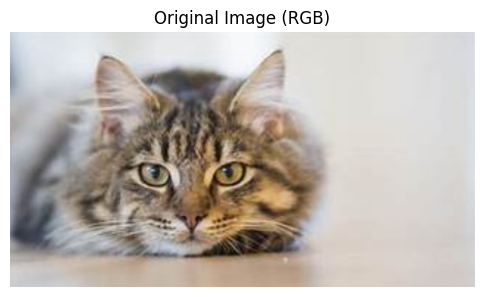

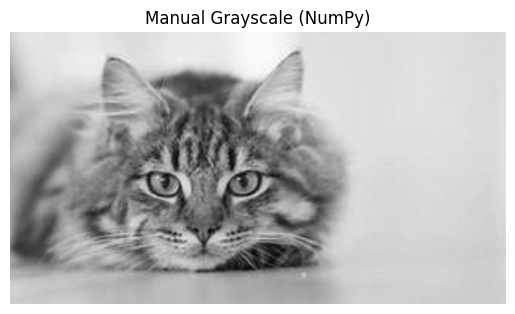

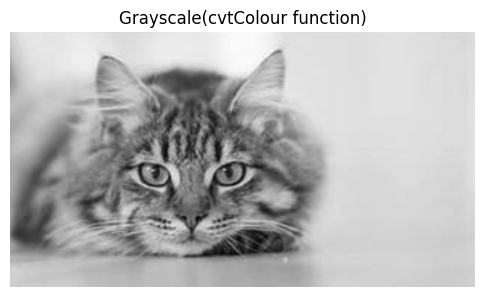

RGB image shape      : (409, 746, 3)
Manual grayscale shape: (409, 746)
cv2 grayscale shape   : (409, 746)

Sample RGB pixel (100,100): [199 199 207]
Manual Gray pixel (100,100): 199
cv2 Gray pixel (100,100)   : 200


In [5]:
# Load RGB image
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr = cv2.imread("/content/drive/MyDrive/meow.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

# Convert to Grayscale
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

gray_manual = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

plt.imshow(gray_manual, cmap="gray")
plt.title("Manual Grayscale (NumPy)")
plt.axis("off")
plt.show()
# Convert to grayscale using cvtColour function
gray_cv= cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray_cv, cmap='gray')
plt.title("Grayscale(cvtColour function)")
plt.axis("off")
plt.show()

# Print array shapes
print("RGB image shape      :", img_rgb.shape)
print("Manual grayscale shape:", gray_manual.shape)
print("cv2 grayscale shape   :", gray_cv.shape)

# Print some pixel values
print("\nSample RGB pixel (100,100):", img_rgb[100, 100])
print("Manual Gray pixel (100,100):", gray_manual[100, 100])
print("cv2 Gray pixel (100,100)   :", gray_cv[100,100])

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

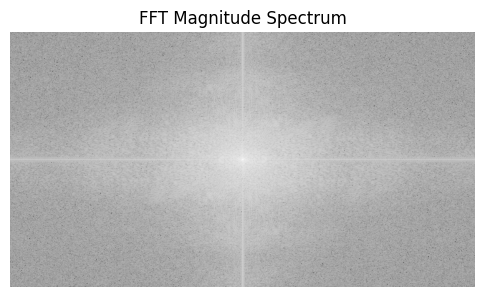

In [6]:
# Compute FFT of the grayscale image
fft_res = np.fft.fft2(gray_manual)

# Shift low-frequency components to the center
fshift = np.fft.fftshift(fft_res)

# Magnitude + log scaling
mag = np.abs(fshift)
mag_log = 20 * np.log(mag + 1)

# Prepare for display
mag_disp = np.log(1 + mag_log)

# Plot spectrum
plt.figure(figsize=(6, 6))
plt.imshow(mag_disp, cmap="gray")
plt.title("FFT Magnitude Spectrum")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

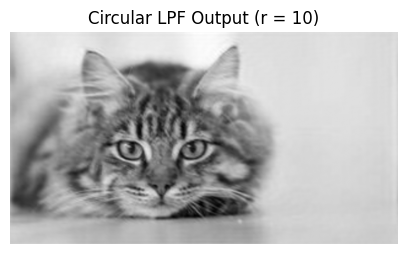

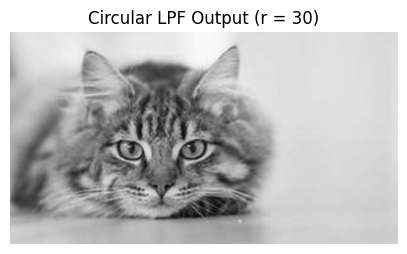

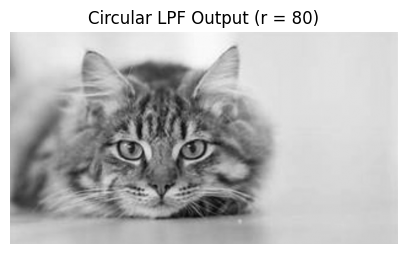

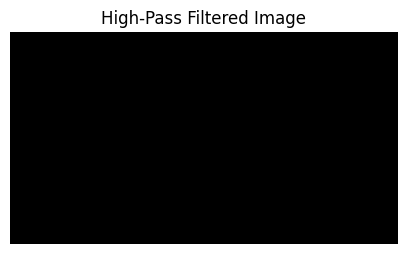

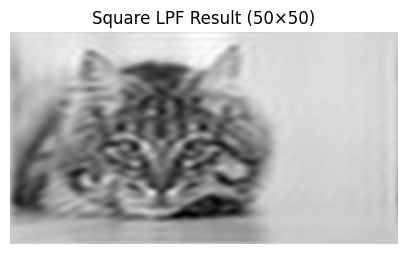

In [7]:
# Get image size and compute center coordinates
height, width = gray_manual.shape
center_y, center_x = height // 2, width // 2

def circular_lowpass(radius):
    # Return a circular low-pass mask with the chosen radius
    mask = np.zeros((height, width), dtype=np.uint8)

    # coordinate grids for distance calculation
    Y, X = np.ogrid[:height, :width]

    # Squared distance of each pixel from the center
    dist2 = (X - center_x)*2 + (Y - center_y)*2

    # Mark inside-circle region as pass-band
    mask[dist2 <= radius * radius] = 1
    return mask

radii = [10, 30, 80]

for r in radii:
    # Build mask for current radius
    mask_c = circular_lowpass(r)

    # Keep only low frequencies
    F_masked = fshift * mask_c

    # Shift back & apply inverse FFT
    F_un = np.fft.ifftshift(F_masked)
    recon_img = np.abs(np.fft.ifft2(F_un))

    # Show result for each radius
    plt.figure(figsize=(5, 5))
    plt.imshow(recon_img, cmap='gray')
    plt.title(f"Circular LPF Output (r = {r})")
    plt.axis("off")
    plt.show()

# High-pass using circular mask

hp_radius = 60
low_mask = circular_lowpass(hp_radius)
high_mask = 1 - low_mask       # invert to get high-pass region

# Apply HP mask in frequency domain
F_high = fshift * high_mask

# Reconstruct back to spatial domain
F_high_un = np.fft.ifftshift(F_high)
img_hpf = np.abs(np.fft.ifft2(F_high_un))

plt.figure(figsize=(5, 5))
plt.imshow(img_hpf, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis("off")
plt.show()

# Square LPF mask

sq_size = 50
square_mask = np.zeros((height, width), dtype=np.uint8)

# centered square pass-band
square_mask[center_y - sq_size//2 : center_y + sq_size//2,
            center_x - sq_size//2 : center_x + sq_size//2] = 1

# Apply square low-pass filter
F_square = fshift * square_mask

# Convert filtered spectrum back to image
F_square_un = np.fft.ifftshift(F_square)
img_sq = np.abs(np.fft.ifft2(F_square_un))

plt.figure(figsize=(5, 5))
plt.imshow(img_sq, cmap='gray')
plt.title("Square LPF Result (50×50)")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

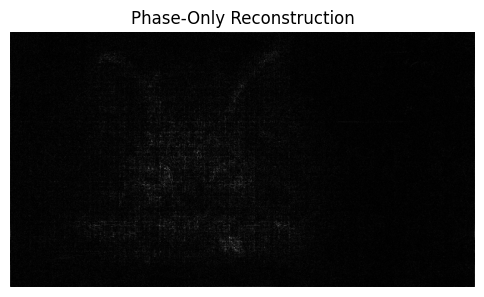

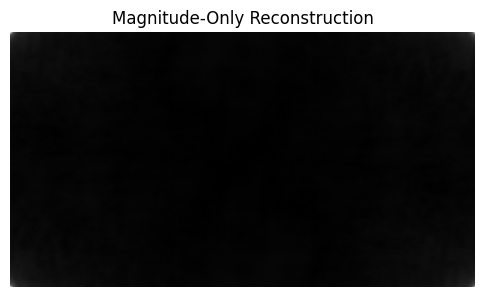

In [8]:
# phase_only = fshift / |fshift|
phase_only = fshift / (np.abs(fshift) + 1e-8)

# Reconstruct from phase-only spectrum
phase_unshift = np.fft.ifftshift(phase_only)
img_phase_only = np.abs(np.fft.ifft2(phase_unshift))

plt.figure(figsize=(6, 6))
plt.imshow(img_phase_only, cmap='gray')
plt.title("Phase-Only Reconstruction")
plt.axis("off")
plt.show()

# Extract magnitude values without any phase
mag_only = np.abs(fshift)

# Represent magnitude as a complex spectrum with zero phase
mag_only_complex = mag_only * np.exp(1j * 0)

# Reconstruct image using only magnitude information
mag_unshift = np.fft.ifftshift(mag_only_complex)
img_mag_only = np.abs(np.fft.ifft2(mag_unshift))

plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only, cmap='gray')
plt.title("Magnitude-Only Reconstruction")
plt.axis("off")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

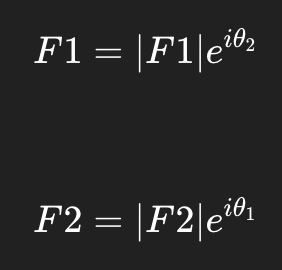

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

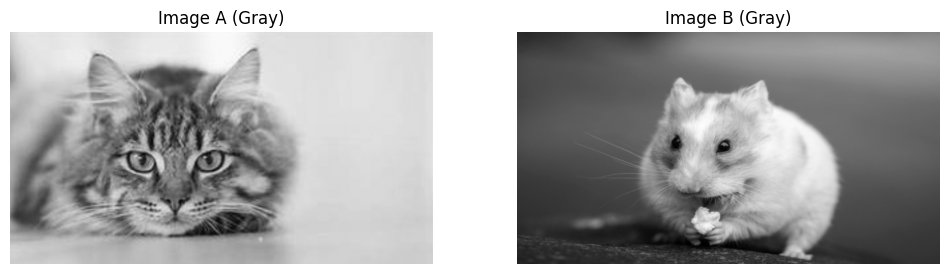

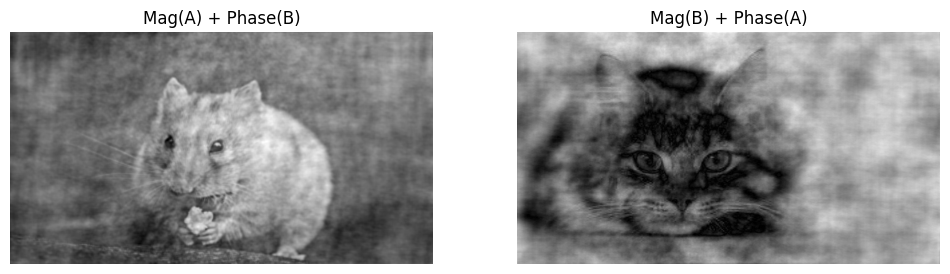

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load second image and convert to RGB
second_bgr = cv2.imread("/content/drive/MyDrive/hamster.jpg")
second_rgb = cv2.cvtColor(second_bgr, cv2.COLOR_BGR2RGB)

# Convert second image to grayscale
gray_B = cv2.cvtColor(second_rgb, cv2.COLOR_RGB2GRAY)

# Resize second grayscale image to match the first one
h1, w1 = gray_manual.shape
gray_B = cv2.resize(gray_B, (w1, h1))

# Show both grayscale images side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_manual, cmap='gray')
plt.title("Image A (Gray)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_B, cmap='gray')
plt.title("Image B (Gray)")
plt.axis("off")
plt.show()

# FFT on Image A
FFT_A = np.fft.fft2(gray_manual)
FFT_A_shifted = np.fft.fftshift(FFT_A)
MAG_A = np.abs(FFT_A_shifted)      # magnitude component of A
PHASE_A = np.angle(FFT_A_shifted)  # phase component of A

# FFT on Image B
FFT_B = np.fft.fft2(gray_B)
FFT_B_shifted = np.fft.fftshift(FFT_B)
MAG_B = np.abs(FFT_B_shifted)      # magnitude of B
PHASE_B = np.angle(FFT_B_shifted)  # phase of B

# Magnitude from A + Phase from B
mix_AplusB = MAG_A * np.exp(1j * PHASE_B)
recon_AplusB = np.abs(np.fft.ifft2(np.fft.ifftshift(mix_AplusB)))

# Magnitude from B + Phase from A
mix_BplusA = MAG_B * np.exp(1j * PHASE_A)
recon_BplusA = np.abs(np.fft.ifft2(np.fft.ifftshift(mix_BplusA)))

# Show swapped reconstructions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(recon_AplusB, cmap='gray')
plt.title("Mag(A) + Phase(B)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(recon_BplusA, cmap='gray')
plt.title("Mag(B) + Phase(A)")
plt.axis("off")

plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
